In [5]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [8]:

# data from https://archive.ics.uci.edu/ml/datsets/Heart+Disease
df = pd.read_csv('datasets/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
df['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

In [14]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


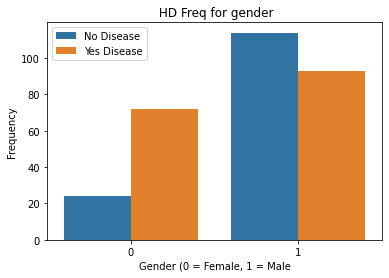

In [16]:
sns.countplot('sex',hue = 'target', data = df)

plt.title(' HD Freq for gender')
plt.legend(['No Disease', 'Yes Disease'])
plt.xlabel('Gender (0 = Female, 1 = Male')
plt.ylabel('Frequency')
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


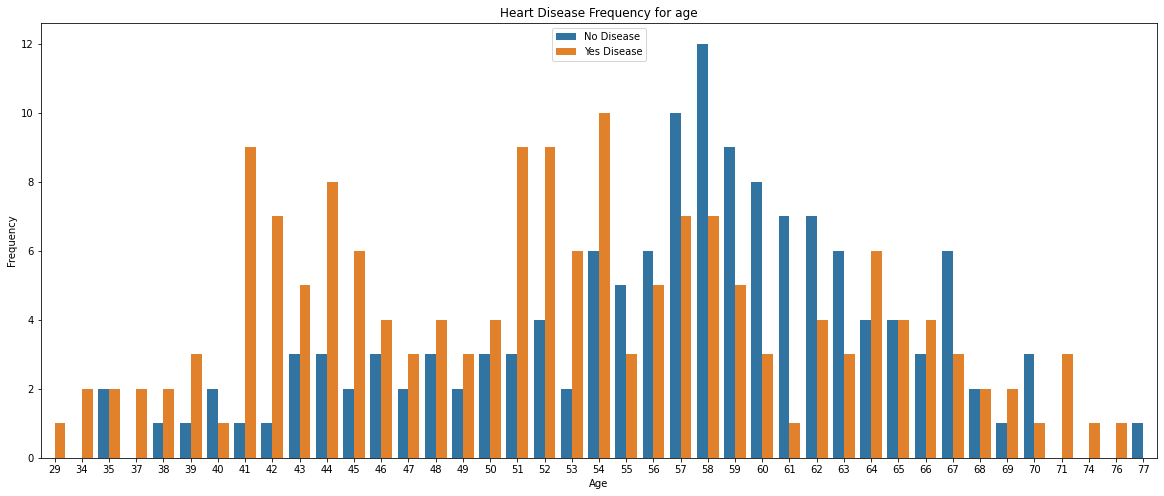

In [19]:
plt.figure(figsize = (20,8))
sns.countplot('age', hue = 'target', data = df)
plt.title('Heart Disease Frequency for age')
plt.legend(['No Disease','Yes Disease'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

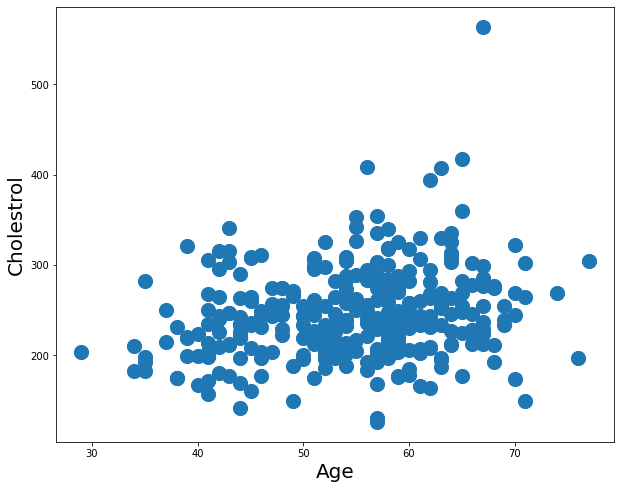

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(df['age'], df['chol'], s = 200)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol',fontsize= 20)
plt.show()

In [21]:
features = df.drop('target', axis=1)
target = df[['target']]

In [22]:
features.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2


In [23]:
target.sample(10)

,target
166,0
224,0
20,1
4,1
25,1
116,1
120,1
169,0
208,0
249,0


In [26]:
categorrical_features = features[['sex','fbs','exang','cp','ca','slope']].copy()
categorrical_features.head()

,sex,fbs,exang,cp,ca,slope
0,1,1,0,3,0,0
1,1,0,0,2,0,0
2,0,0,0,1,0,2
3,1,0,0,1,0,2
4,0,0,1,0,0,2


In [27]:
numeric_features = features[['age','trestbps','chol','thalach','oldpeak']].copy()
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [32]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)
numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-2.345026e-17,1.172513e-17,3.517538e-17,2.345026e-17,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [33]:
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [31]:
processed_features = pd.concat([numeric_features,categorrical_features], axis=1, sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_features,target, test_size = 0.2, random_state = 1)

In [35]:
x_train, x_val, y_train,y_val = train_test_split(processed_features,target, test_size = 0.15, random_state = 1)

In [36]:
x_train.shape, x_val.shape, x_test.shape

((257, 11), (46, 11), (61, 11))

In [37]:
y_train.shape,y_val.shape,x_test.shape

((257, 1), (46, 1), (61, 11))

In [44]:
def build_model():
    inputs= tf.keras.Input(shape=(x_train.shape[1],))
    dense_layer1 = layers.Dense(12,activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy',
            tf.keras.metrics.Precision(0.5),    
            tf.keras.metrics.Recall(0.5),])

    return model


In [47]:
model = build_model()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                144       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


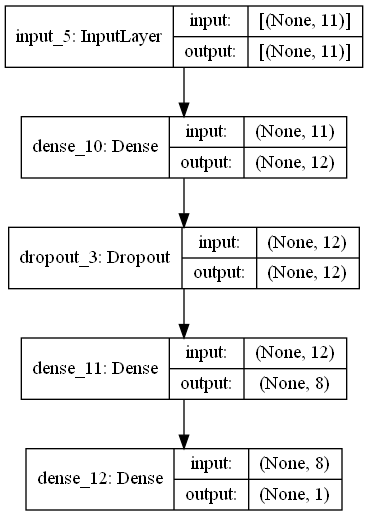

In [48]:
keras.utils.plot_model(model,show_shapes=True)

In [54]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 11), (None, 1)), types: (tf.float64, tf.int64)>

In [55]:
num_epochs = 100

In [56]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)


In [57]:
model = build_model()
training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val) 
 

val_precision_2: 0.7143 - val_recall_2: 0.8696
Epoch 15/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7167 - precision_2: 0.7006 - recall_2: 0.8393 - val_loss: 0.5631 - val_accuracy: 0.7826 - val_precision_2: 0.7407 - val_recall_2: 0.8696
Epoch 16/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7287 - precision_2: 0.7118 - recall_2: 0.8478 - val_loss: 0.5497 - val_accuracy: 0.7826 - val_precision_2: 0.7407 - val_recall_2: 0.8696
Epoch 17/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7092 - precision_2: 0.6913 - recall_2: 0.8470 - val_loss: 0.5374 - val_accuracy: 0.7826 - val_precision_2: 0.7407 - val_recall_2: 0.8696
Epoch 18/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7500 - precision_2: 0.7258 - recall_2: 0.8716 - val_loss: 0.5262 - val_accuracy: 0.7826 - val_precision_2: 0.7407 - val_recall_2: 0.8696
Epoch 19/100
17/17 [=====

In [58]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2'])

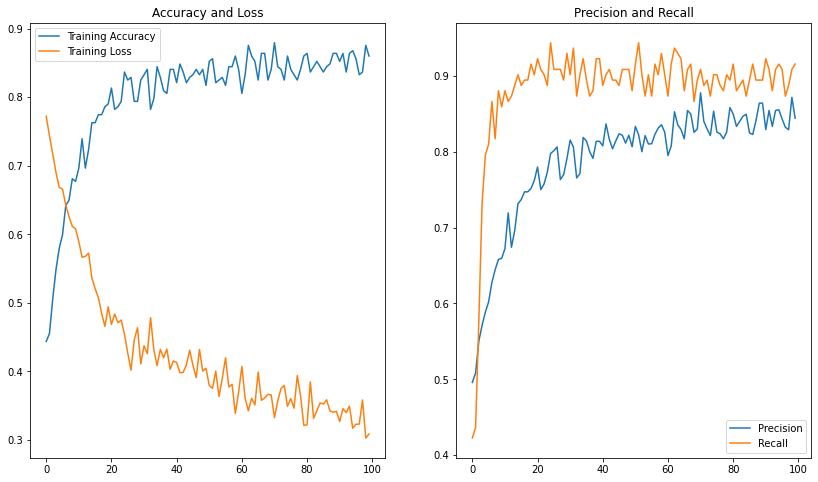

In [61]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_2']
recall = training_history.history['recall_2']

epochs_range = range(num_epochs)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)

plt.plot(epochs_range,train_acc,label='Training Accuracy')
plt.plot(epochs_range,train_loss,label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()


In [65]:
score = model.evaluate(x_test,y_test)
score_df = pd.Series(score,index = model.metrics_names)

score_df


2/2 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7541 - precision_2: 0.7222 - recall_2: 0.8387


loss           0.606674
accuracy       0.754098
precision_2    0.722222
recall_2       0.838710
dtype: float64

In [66]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.00196245],
       [0.9449167 ],
       [0.05582273],
       [0.02265924],
       [0.06243181],
       [0.01288801],
       [0.0092335 ],
       [0.7595314 ],
       [0.00881213],
       [0.9812334 ]], dtype=float32)

In [70]:
y_pred = np.where(y_pred>=0.5,1,y_pred)
y_pred = np.where(y_pred<0.5,0,y_pred)

In [72]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                            'y_pred': y_pred.flatten().astype('int32')}, index= range(len(y_pred)))

In [74]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,20,5
1,10,26
